C:\Users\Shama\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Shama\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Shama\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Shama\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, w

Silhouette Score for k-Means: 0.7017242160053677
Silhouette Score for GMM: 0.9024691358024692


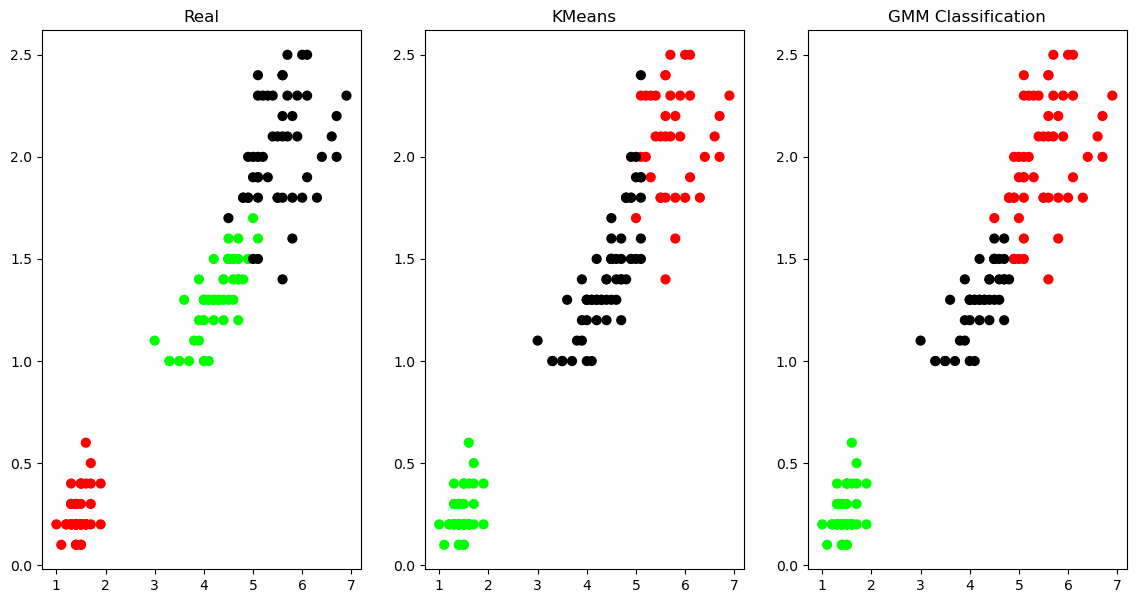

In [1]:
from sklearn.cluster import KMeans 
from sklearn import preprocessing 
from sklearn.mixture import GaussianMixture 
from sklearn.datasets import load_iris 
import sklearn.metrics as sm 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

dataset=load_iris()

X=pd.DataFrame(dataset.data) 
X.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width'] 
y=pd.DataFrame(dataset.target) 
y.columns=['Targets']

plt.figure(figsize=(14,7)) 
colormap=np.array(['red','lime','black']) 

plt.subplot(1,3,1) 
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y.Targets],s=40) 
plt.title('Real') 

plt.subplot(1,3,2) 
model=KMeans(n_clusters=3) 
model.fit(X) 
predY=np.choose(model.labels_,[0,1,2]).astype(np.int64) 
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[predY],s=40) 
plt.title('KMeans') 

scaler=preprocessing.StandardScaler() 
scaler.fit(X) 
xsa=scaler.transform(X) 
xs=pd.DataFrame(xsa,columns=X.columns) 
gmm=GaussianMixture(n_components=3) 
gmm.fit(xs) 
y_cluster_gmm=gmm.predict(xs) 
plt.subplot(1,3,3) 
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y_cluster_gmm],s=40) 
plt.title('GMM Classification')

kmeans_labels = model.labels_ 
kmeans_labels

gmm_labels = gmm.fit_predict(X) 
gmm_labels
from sklearn.metrics import adjusted_rand_score, silhouette_score
silhouette_kmeans = silhouette_score(y, kmeans_labels) 
silhouette_gmm = silhouette_score(y, gmm_labels) 
print(f'Silhouette Score for k-Means: {silhouette_kmeans}') 
print(f'Silhouette Score for GMM: {silhouette_gmm}')                                    
